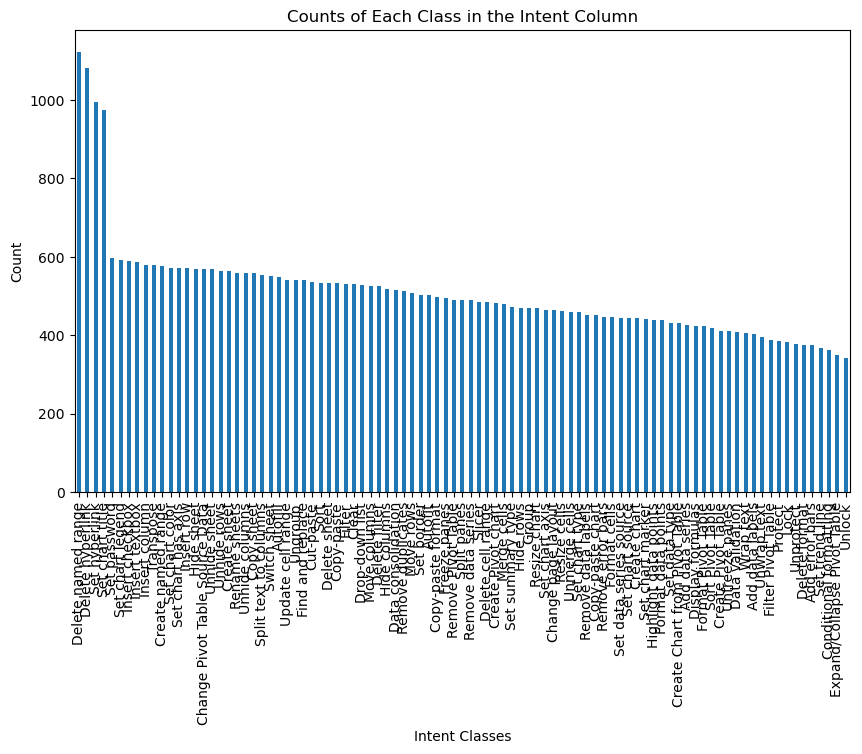

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the data from the Excel file
file_path = 'Book1.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Display a bar chart of the counts of each class in the intent column
intent_counts = df['intent'].value_counts()

plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar')
plt.xlabel('Intent Classes')
plt.ylabel('Count')
plt.title('Counts of Each Class in the Intent Column')
plt.show()

In [2]:
min_count = intent_counts.min()

# Resample each class to the minimum count
balanced_df = pd.DataFrame()

for intent in intent_counts.index:
    class_subset = df[df['intent'] == intent]
    class_subset_resampled = resample(class_subset, 
                                      replace=False,  # sample without replacement
                                      n_samples=min_count,  # to match the least occurring class
                                      random_state=42)  # for reproducibility
    balanced_df = pd.concat([balanced_df, class_subset_resampled])

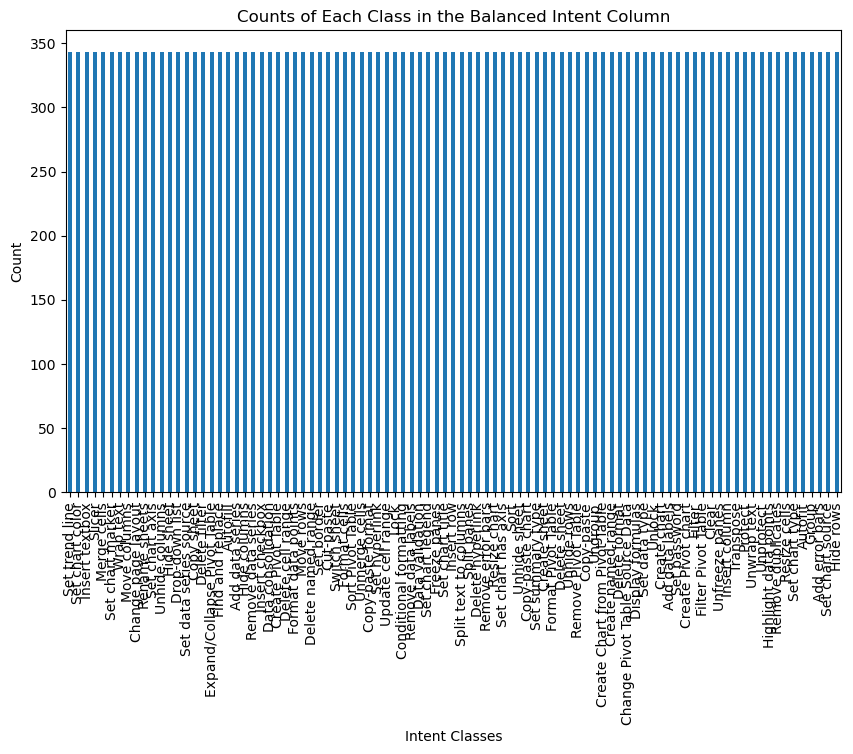

In [3]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the counts of each class in the balanced dataframe
balanced_intent_counts = balanced_df['intent'].value_counts()

plt.figure(figsize=(10, 6))
balanced_intent_counts.plot(kind='bar')
plt.xlabel('Intent Classes')
plt.ylabel('Count')
plt.title('Counts of Each Class in the Balanced Intent Column')
plt.show()

# Save the balanced data to a new Excel file (optional)
balanced_df.to_csv('balanced_data.csv', index=False)